In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

%matplotlib inline


document = pd.read_csv('input/Indicators.csv')


Objective : plot on same graph unemployment in france Male VS female youth (15-24)
later plot France Germany Switzerland UK unemployment on same graph

In [23]:
document.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [24]:
France_UEM_FEM = document.query("CountryCode == 'FRA'   & IndicatorCode == 'SL.UEM.1524.FE.NE.ZS'")
France_UEM_MA = document.query("CountryCode == 'FRA'   & IndicatorCode == 'SL.UEM.1524.MA.NE.ZS'")
#Unemployment for women and men

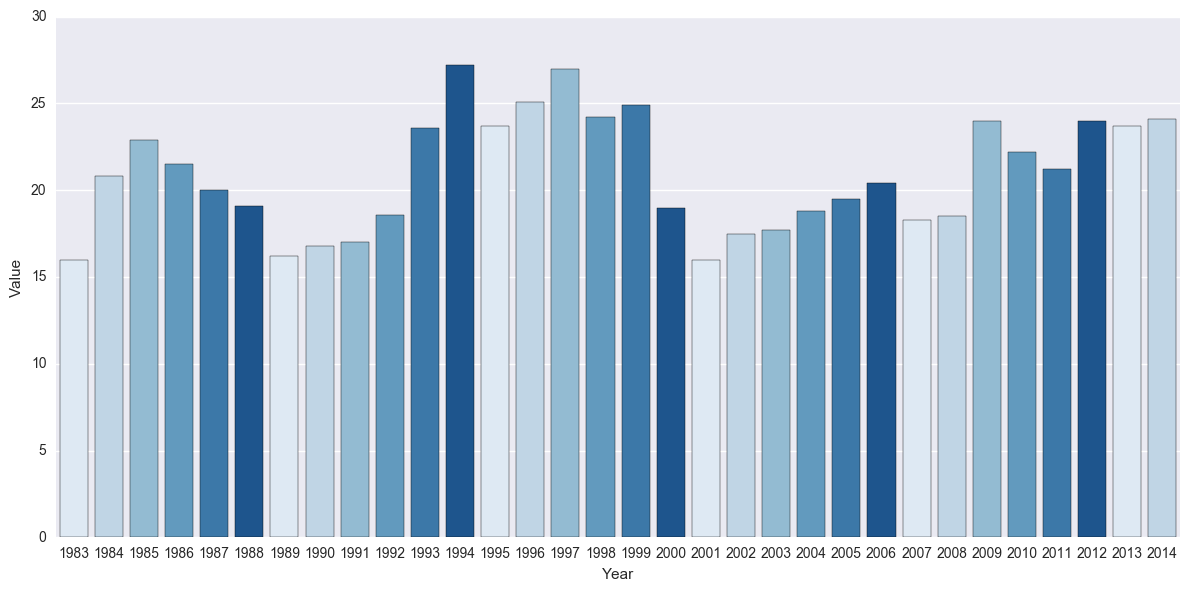

In [27]:
France_UEM_FEM = France_UEM_FEM[["Year","Value"]]
France_UEM_MA = France_UEM_MA[["Year","Value"]]
sns.factorplot("Year","Value",data=France_UEM_MA, size=6, aspect=2,kind="bar",palette=sns.color_palette("Blues"))

In [5]:
France_UEM_FEM.index=France_UEM_FEM["Year"]
France_UEM_FEM.drop("Year",axis=1,inplace=True)
France_UEM_MA.index=France_UEM_MA["Year"]
France_UEM_MA.drop("Year",axis=1,inplace=True)

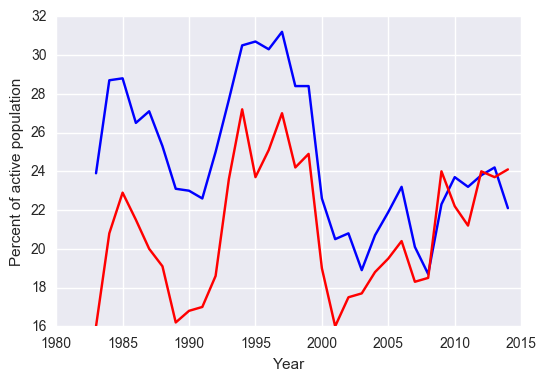

In [7]:
plt.plot(France_UEM_FEM,color ='b')
plt.plot(France_UEM_MA,color ='r')
plt.ylabel('Percent of active population')
plt.xlabel('Year')

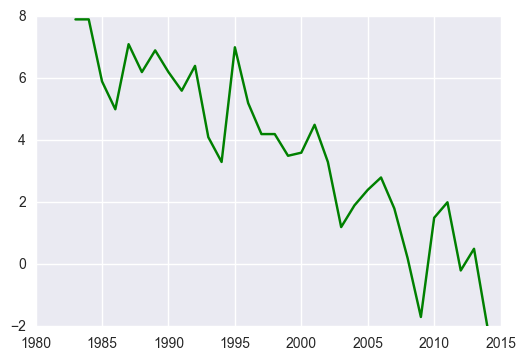

In [8]:
France_UEM_Delta = France_UEM_MA
France_UEM_Delta["Value"] = France_UEM_FEM["Value"]-France_UEM_MA["Value"]
plt.plot(France_UEM_Delta,color="g")

Employment inequalities between men and women tend to go down in after 1995. It is oscillating around 22.5% after 2000, which is a pretty large value

Let's compare this to global youth unemployment in France.

In [9]:
France_UEM_TTLY = document.query("CountryCode == 'FRA'   & IndicatorCode == 'SL.UEM.1524.NE.ZS'")
France_UEM_TTLY = France_UEM_TTLY[["Year","Value"]]
France_UEM_TTLY.index=France_UEM_TTLY["Year"]
France_UEM_TTLY.drop("Year",axis=1,inplace=True)

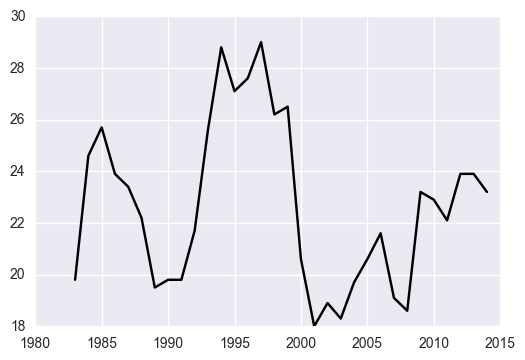

In [10]:
plt.plot(France_UEM_TTLY,color="k")

In [11]:
France_UEM_TTL = document.query("CountryCode == 'FRA'   & IndicatorCode == 'SL.UEM.TOTL.NE.ZS'")
France_UEM_TTL = France_UEM_TTL[["Year","Value"]]
France_UEM_TTL.index=France_UEM_TTL["Year"]
France_UEM_TTL.drop("Year",axis=1,inplace=True)

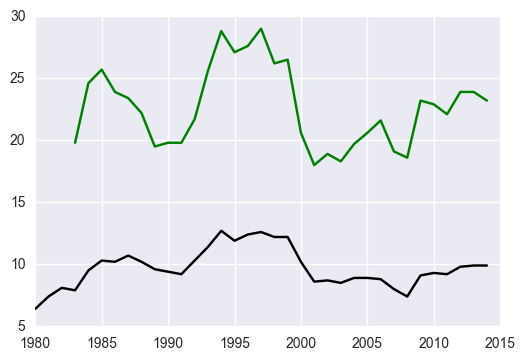

In [12]:
plt.plot(France_UEM_TTL,color="k")
plt.plot(France_UEM_TTLY,color="g")

The unemployment among young people is staggeringly larger. It is more than twice the national value. we lack the numbers of young people vs older to estimate precisely the unemployment rate among older people.

What of the the other countries? Let's plot the unemployment rate (total and young in seperate graphs) for France, UK, Germany, Spain, Switzerland and the European Union.

In [13]:
#gather data
main_df = document.query("CountryCode == ['CHE', 'DEU', 'FRA', 'GBR', 'ESP', 'EUU']   & IndicatorCode == ['SL.UEM.1524.NE.ZS', 'SL.UEM.TOTL.NE.ZS']")


In [14]:
main_df.drop(["CountryName","IndicatorName"],axis=1)

,CountryCode,IndicatorCode,Year,Value
1044477,FRA,SL.UEM.TOTL.NE.ZS,1980,6.400000
1080559,ESP,SL.UEM.TOTL.NE.ZS,1980,11.100000
1080562,ESP,SL.UEM.1524.NE.ZS,1980,25.299999
1127528,FRA,SL.UEM.TOTL.NE.ZS,1981,7.400000
1164233,ESP,SL.UEM.TOTL.NE.ZS,1981,13.700000
...,...,...,...,...
5625646,ESP,SL.UEM.1524.NE.ZS,2014,53.200001
5629696,CHE,SL.UEM.TOTL.NE.ZS,2014,4.500000
5629702,CHE,SL.UEM.1524.NE.ZS,2014,8.600000
5637236,GBR,SL.UEM.TOTL.NE.ZS,2014,6.100000


In [15]:
#dframe[dframe["c"]>=7]
UEMY=main_df[main_df["IndicatorCode"]=="SL.UEM.1524.NE.ZS"]
UEM=main_df[main_df["IndicatorCode"]=="SL.UEM.TOTL.NE.ZS"]

In [16]:
UEMY

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1080562,Spain,ESP,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.NE.ZS,1980,25.299999
1164236,Spain,ESP,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.NE.ZS,1981,30.900000
1249207,Spain,ESP,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.NE.ZS,1982,34.700001
1264884,European Union,EUU,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.NE.ZS,1983,20.694640
1297329,France,FRA,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.NE.ZS,1983,19.799999
...,...,...,...,...,...,...
5576779,France,FRA,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.NE.ZS,2014,23.200001
5578936,Germany,DEU,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.NE.ZS,2014,7.700000
5625646,Spain,ESP,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.NE.ZS,2014,53.200001
5629702,Switzerland,CHE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.NE.ZS,2014,8.600000


In [17]:
UEM

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1044477,France,FRA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,1980,6.4
1080559,Spain,ESP,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,1980,11.1
1127528,France,FRA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,1981,7.4
1164233,Spain,ESP,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,1981,13.7
1212129,France,FRA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,1982,8.1
...,...,...,...,...,...,...
5576773,France,FRA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,2014,9.9
5578930,Germany,DEU,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,2014,5.0
5625640,Spain,ESP,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,2014,24.4
5629696,Switzerland,CHE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,2014,4.5


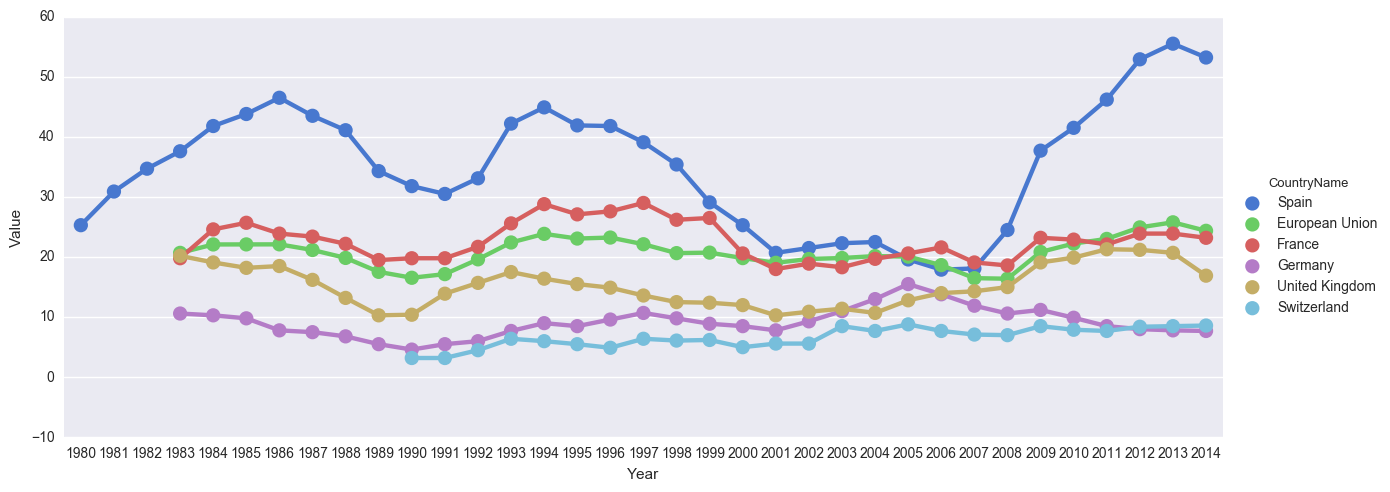

In [18]:
g = sns.factorplot(x="Year", y="Value", hue="CountryName", data=UEMY,
                   capsize=1, palette="muted", size=5, aspect=2.5)
g.despine(left=True)
#Youth unemployment in Europe

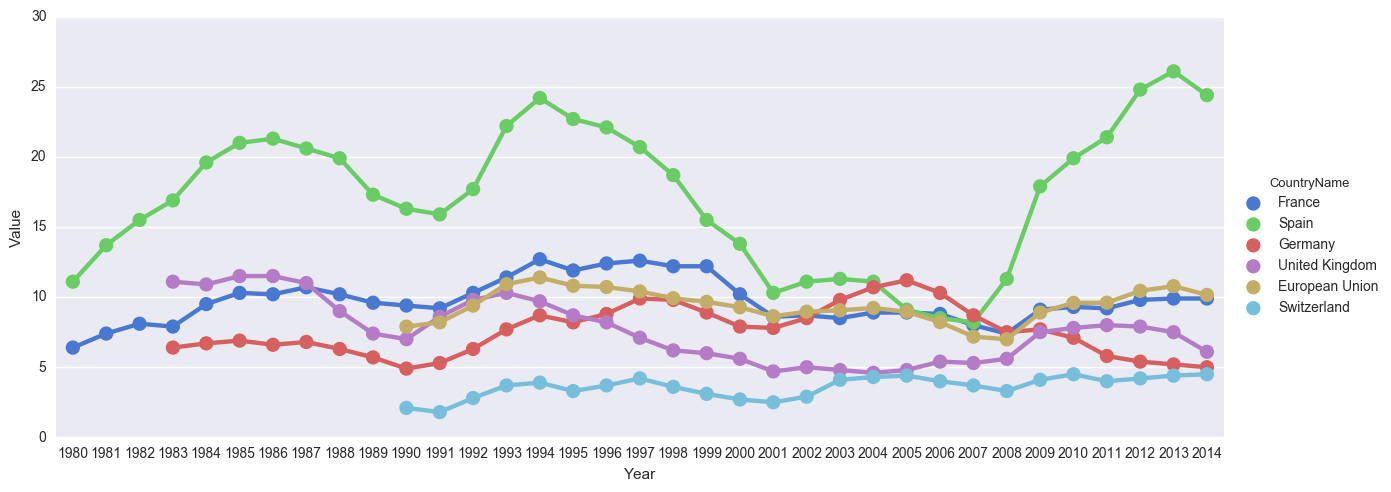

In [19]:
g = sns.factorplot(x="Year", y="Value", hue="CountryName", data=UEM,
                   capsize=1, palette="muted", size=5, aspect=2.5)
g.despine(left=True)
# unemployment in Europe

In [20]:
#Todo : fix colorcode